In [23]:
import pandas as pd
import matplotlib.pyplot as plt

import re
import matplotlib.pyplot as plt
attacks = pd.read_csv("input/attacks.csv",encoding='utf-8')
attacks.Activity.value_counts().head(10)
import src.helpers as helpers



In [24]:
attacks['Month']= attacks['Date'].map(helpers.get_month)
attacks['Season']= attacks['Month'].map(get_season)

attacks['activity_clean']= attacks['Activity'].map(helpers.clean_activity)
attacks.activity_clean.value_counts()



below_surface                                                                                         2975
above_surface                                                                                         1508
fishing                                                                                                661
Sea disaster                                                                                             8
Playing                                                                                                  7
                                                                                                      ... 
Arsinoe, a French tanker                                                                                 1
Ferry capsized                                                                                           1
Harpooned shark                                                                                          1
Crouching in 2' of water             

In [25]:

by_activity = attacks.groupby(['activity_clean','Fatal (Y/N)']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)
by_activity


,activity_clean,Fatal (Y/N),counts
451,below_surface,N,1844
446,above_surface,N,1323
453,below_surface,Y,865
459,fishing,N,541
448,above_surface,Y,117
...,...,...,...
158,Ferry boat sank,N,1
157,Ferry boat Dona Paz with 4431 passengers explo...,Y,1
156,Feeling the shark�s teeth,N,1
154,Feeding prawns to captive sharks,N,1


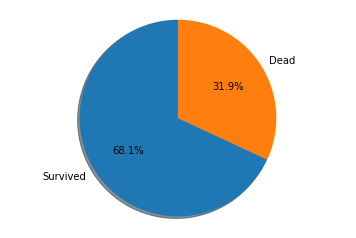

In [26]:
labels = 'Survived','Dead',

below_surface =by_activity[ by_activity['activity_clean']=='below_surface'][:2]['counts']

fig1, ax1 = plt.subplots()
ax1.pie(below_surface,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


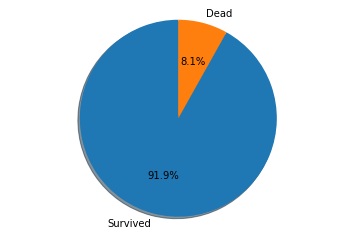

In [27]:
import matplotlib.pyplot as plt
labels = 'Survived','Dead',

below_surface =by_activity[ by_activity['activity_clean']=='above_surface'][:2]['counts']

fig1, ax1 = plt.subplots()
ax1.pie(below_surface,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [29]:
attacks['Shark type']= attacks.apply(fix_species_name, axis='columns')
attacks['Area Total']=attacks['Area'].groupby(attacks['Area']).transform('count')

In [10]:
def count_species(df):
        return df['Shark type'].value_counts()
# attacks.groupby(['Area','activity_clean']).apply(count_species).size().reset_index(name='counts')
attacks.groupby(['Area','Area Total','activity_clean']).apply(count_species).reset_index().sort_values(by=["Area Total",'Shark type'],ascending=False)

,Area,Area Total,activity_clean,level_3,Shark type
434,Florida,1037.0,below_surface,nurse,22
361,Florida,1037.0,above_surface,4' to 5',15
435,Florida,1037.0,below_surface,bull,15
362,Florida,1037.0,above_surface,4',13
363,Florida,1037.0,above_surface,3',11
...,...,...,...,...,...
1591,West Africa,1.0,above_surface,3 m [10'] white,1
1594,West coast,1.0,below_surface,2,1
1731,Western Caroline Islands (North Pacific Ocean),1.0,below_surface,1 m,1
1734,Worcestershire,1.0,Feeding prawns to captive sharks,"miami, a 60 cm blacktip",1


In [11]:
attacks.groupby(['activity_clean','Fatal (Y/N)']).apply(count_species).reset_index().sort_values(by=['Shark type'],ascending=False)[:30]

,activity_clean,Fatal (Y/N),level_2,Shark type
207,above_surface,N,white,143
488,below_surface,N,white,102
489,below_surface,N,tiger,73
842,below_surface,Y,white,72
208,above_surface,N,tiger,71
490,below_surface,N,bull,57
953,fishing,N,white,51
843,below_surface,Y,tiger,40
492,below_surface,N,wobbegong,31
491,below_surface,N,nurse,31


In [12]:
by_activity_and_season = attacks.groupby(['activity_clean','Season']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)[:50]